<a href="https://colab.research.google.com/github/HwangHanJae/BigDataPratice/blob/main/3_week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#작업형1

데이터 출처 :https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction(참고, 데이터 수정)

데이터 설명 : 자동차 보험 가입 예측

Data url : https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv

##Q1. Vehicle_Age 값이 2년이상인 사람들 중 Annual_Premium 값이 해당 그룹의 중간값 이상인 사람들을 찾고, 그들의 Vintage값의 평균을 구하여라

In [8]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")

data = df.loc[df["Vehicle_Age"] == "> 2 Years"]

data.loc[data["Annual_Premium"] >= data["Annual_Premium"].median()]["Vintage"].mean()

154.55906743858552

##Q2. vehicle_age에 따른 각 성별(gender)그룹의 Annual_Premium값의 평균을 구하여 아래 테이블과 동일하게 구현하라

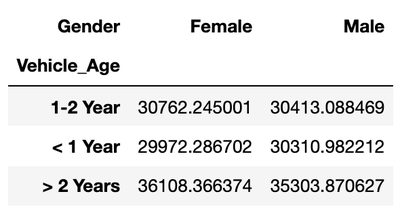

In [39]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/insurance/train.csv")

meanf = df.groupby(["Vehicle_Age", "Gender"], as_index=False)["Annual_Premium"].mean()
print(meanf)
meanf.pivot(index="Vehicle_Age", columns="Gender",values = "Annual_Premium")

  Vehicle_Age  Gender  Annual_Premium
0    1-2 Year  Female    30762.245001
1    1-2 Year    Male    30413.088469
2    < 1 Year  Female    29972.286702
3    < 1 Year    Male    30310.982212
4   > 2 Years  Female    36108.366374
5   > 2 Years    Male    35303.870627


Gender,Female,Male
Vehicle_Age,,
1-2 Year,30762.245001,30413.088469
< 1 Year,29972.286702,30310.982212
> 2 Years,36108.366374,35303.870627


#작업형2

## 데이터 출처 :https://www.kaggle.com/ronitf/heart-disease-uci (참고, 데이터 수정)

데이터 설명 : 심장질환예측

문제타입 : 분류유형

평가지표 : f1-score

trainData url : https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/train.csv

testData url : https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/test.csv

subData url : https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/submission.csv


In [64]:
trainData = "https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/train.csv"
testData = "https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/test.csv"
subData = "https://raw.githubusercontent.com/Datamanim/datarepo/main/heart/submission.csv"

import pandas as pd

train = pd.read_csv(trainData)
test = pd.read_csv(testData)
submission = pd.read_csv(subData)

train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
1,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
2,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
3,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
4,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
238,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
239,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
240,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1


In [65]:
#NULL값은 없는 것으로 파악
print(train.isnull().sum())
#범주형 자료도 없음
train.info()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
 13  target    242 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.6 KB


In [66]:
#훈련데이터와 타겟데이터 분리 
X = train.drop(["target"], axis=1)
y = train["target"]

In [58]:
#스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = scaler.fit_transform(X)
test = scaler.fit_transform(test)

In [67]:
#훈련데이터, 테스트데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42, stratify = y)

#모델링
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

#평가지표 f1_score
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred))

0.8764044943820225


In [73]:
#제출
pred = rf.predict(test)
submission["0"] = pred
submission.to_csv("수험번호.csv", index=False)